<h3>Gradiente descendente</h3><br>
Os métodos baseados no gradiente descendente são os mais comummente utilizados para encontrar uma sequência minimizadora de uma dada função $f(x)$<br>

O algoritmo seguinte mostra a forma geral do processo iterativo do gradiente. Na sua forma mais simples, a matriz <b>B</b> é a matriz identidade e a direção descendente é simplesmente o gradiente negativo da função:
<ol>
    <li><b>dado</b> um ponto inicial $x_0$, $i = 0$</li>
    <li><b>repetir</b></li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calcular o <i>step size</i>(ou learning rate) $\eta$</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calcular a direcção descendente $-\mathbf B \nabla f(x_i)$</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{i+1} \leftarrow x_i -\eta \mathbf B \nabla f(x_i)$</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $i \leftarrow i + 1$</li>
    <li><b>até</b> o critério de paragem ser satisfeito</li>
</ol>

Considerando a seguinte função:

$$f(x) = (x + 2)^2 - 16exp(-(x - 2)^2)$$

a sua implementação é:

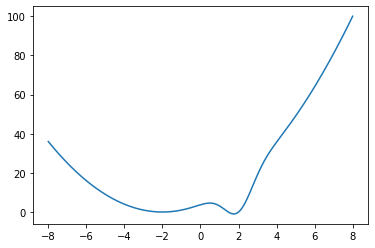

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f_x(x):
    return np.power(x + 2, 2) - 16 * np.exp(-np.power((x - 2), 2))

#Vejamos a sua forma no intervalo [-8, 8]
def main_plot():
    x = np.arange(-8, 8, 0.001)
    y = map(lambda u: f_x(u), x)
    plt.plot(x, list(y))
    
plt.show()
main_plot()


Esta função não foi escolhida ao acaso. Como se pode ver pelo gráfico, a função não é convexa (apresenta um mínimo local)

O gradiente da função $f(x) = (x + 2)^2 - 16exp(-(x - 2)^2)$ é:

$$
\frac{df(x)}{dx} = (2x + 4) - 16(-2x + 4)exp(-(x - 2)^2)
$$

que podemos implementar da seguinte forma:

In [3]:
def grad_f_x(x):
    return (2 * x - 4) - 16 * (-2 * x + 4) * np.exp(-np.power(x - 2, 2))

- Agora que já possuimos a função e o seu gradiente, podemos implementar um método de gradiente descendente:

In [4]:
def gradient_descent(x0, func, grad):
    #precisão da solução
    precision = 0.001
    #Learning rate: muito pequeno pode demorar muito a convergir; muito grande pode fazer um 'overshoot' ao mínimo
    learning_rate = 0.0001
    #Temos de dar um limite ao número de iterações
    max_iter = 10000
    x_new = x0
    res = []
    for i in range(max_iter):
        x_old = x_new
        #Vamos usar B = 1
        x_new = x_old - learning_rate * grad(x_old)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new, f_x_new])
        #print(f_x_new - f_x_old)
        if(abs (f_x_new - f_x_old) < precision):
            print("Precisão %f alcançada:" % (f_x_new - f_x_old))
            return np.array(res)
    print("Iteracção máxima alcançada")
    return np.array(res)

Precisão -0.001000 alcançada:


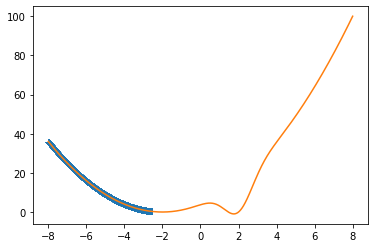

In [5]:
#Vamos então tentar encontrar o mínimo da função começando com um valor inicial de x0 = -8

x0 = -8
res = gradient_descent(x0, f_x, grad_f_x)
plt.plot(res[:,0], res[:, 1], '+')
main_plot()
plt.show()

Como começámos a sequência de minimização pelo lado esquerdo, com $x_0 = -8$, alcançámos o mínimo local. <br>
Se escolhermos agora como valor inicial $x_0 = 8$, obtemos:

Precisão -0.000998 alcançada:


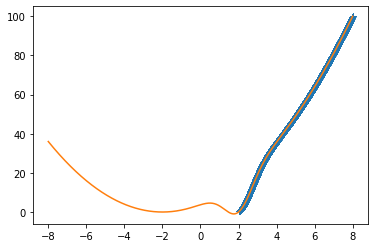

In [6]:
x0 = 8
res = gradient_descent(x0, f_x, grad_f_x)
plt.plot(res[:,0], res[:, 1], '+')
main_plot()
plt.show()

Agora alcaçámos o mínimo global. Será interessante experimentar com diferentes valores do <i>learning rate</i> e a precisão

- Consideremos agora o problema da regressão linear (método dos MQO) no seguinte conjunto de dados que mostra os recordes olímpicos ao longo dos anos:

In [7]:
import pandas as pd

data_set = pd.read_csv('D:/Desktop/datascience/BD/2016_olimpics/results.csv', error_bad_lines=False)

b'Skipping line 156: expected 8 fields, saw 9\nSkipping line 157: expected 8 fields, saw 9\nSkipping line 158: expected 8 fields, saw 9\nSkipping line 317: expected 8 fields, saw 9\nSkipping line 318: expected 8 fields, saw 9\nSkipping line 319: expected 8 fields, saw 9\nSkipping line 1658: expected 8 fields, saw 9\nSkipping line 1659: expected 8 fields, saw 9\nSkipping line 1660: expected 8 fields, saw 9\nSkipping line 1784: expected 8 fields, saw 9\nSkipping line 1785: expected 8 fields, saw 9\nSkipping line 1786: expected 8 fields, saw 9\n'


In [8]:
data_set = data_set[['Year','Result']]

In [9]:
data_set

,Year,Result
0,2016,25:05.17
1,2016,27:05.64
2,2016,27:06.26
3,2008,27:01.17
4,2008,27:02.77
...,...,...
2377,2004,15.25
2378,2004,15.14
2379,1996,15.33
2380,1996,14.98


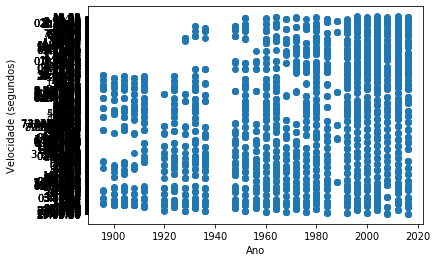

      Year    Result
0     2016  25:05.17
1     2016  27:05.64
2     2016  27:06.26
3     2008  27:01.17
4     2008  27:02.77
...    ...       ...
2377  2004     15.25
2378  2004     15.14
2379  1996     15.33
2380  1996     14.98
2381  1996     14.98

[2382 rows x 2 columns]


In [10]:

def get_data_set():
    #print(data_set.shape)
    x = data_set['Year']
    y = data_set['Result']
    return x,y

x,y = get_data_set()

plt.xlabel("Ano")
plt.ylabel("Velocidade (segundos)")
plt.plot(x, y, 'o')
plt.show()

print(data_set)

Neste caso o nosso modelo pode ser escrito da seguinte forma:

$$
t_n = f(x_n;w_0,w_1) = \mathbf w^T \mathbf x_n = w_0 + w_1x_n
$$
e
$$
\mathbf w = \begin{bmatrix}
            w_0 \\
            w_1 \\
            \end{bmatrix}
$$
<br>
$$
\mathbf x_n = \begin{bmatrix}
            1 \\
            x_n \\
            \end{bmatrix}
$$
Aqui o truque, de forma a conseguir vectorizar, é combinar $w_0$ e $w_1$ num único vector de parâmetros e criar um vector de dados $x_n$, aumentando cada $x_n$ com um 1.<br>
Podemos definir a função de erro para cada valor possível de $\mathbf w$:

$$
e(\mathbf w) = \frac{1}{N}\sum_{n=1}^N (t_n - \mathbf w^T \mathbf x_n)^2
$$

ou, melhor ainda, na sua forma vectorizada:

$$
e(\mathbf w) = \frac{1}{N} (\mathbf t - \mathbf X \mathbf w)^T(\mathbf t - \mathbf X \mathbf w)
$$

onde 
<p>
$
\mathbf X = \begin{bmatrix}
            \mathbf x_1^T \\
            \mathbf x_2^T \\
            . \\
            . \\
            . \\
            \mathbf x_n^T \\
            \end{bmatrix}
          = \begin{bmatrix}
            1 & x_1 \\
            1 & x_2 \\
            . & .    \\
            . & .    \\
            . & .    \\
            1 & x_n \\
            \end{bmatrix}
$, 
$
\mathbf t = \begin{bmatrix}
            t_1 \\
            t_2 \\
            . & .    \\
            . & .    \\
            . & .    \\
            t_n \\
            \end{bmatrix}
$<p>
Será esta a função que queremos minimizar de forma a encontrar os valores óptimos de $\mathbf w \in \Bbb R^2$. Para tal, teremos de encontrar o gradiente do erro $\frac{\partial e}{\partial \mathbf w} = \begin{bmatrix}
            \frac{\partial e}{\partial w_0} \\
            \frac{\partial e}{\partial w_1} \\
            \end{bmatrix}$
    
<p></p>
Obtemos:
$$
\frac{\partial e}{\partial \mathbf w} = \frac{2}{N} \mathbf X^T \mathbf X \mathbf w - \frac{2}{N} \mathbf X^T \mathbf t = \frac{2}{N} \mathbf X^T (\mathbf X \mathbf w - \mathbf t)$$
    
    
Então, de acordo com a regra de update do pseudo-código:

$$
\mathbf w := \mathbf w - \eta \frac{2}{N} \mathbf X^T (\mathbf X \mathbf w - \mathbf t)
$$

<b>Nota:</b> Algumas identidades úteis para quando estamos a diferenciar a respeito de um vector:

$$
$$
\begin{array}{c|lcr}
f(\mathbf w) & \frac{\partial f}{\partial \mathbf w} \\
\hline
\mathbf w^T \mathbf x & \mathbf x \\
\mathbf x^T \mathbf w & \mathbf x \\
\mathbf w^T \mathbf w & 2\mathbf w \\
\mathbf w^T \mathbf C \mathbf w & 2\mathbf C \mathbf w \\
\end{array}
$$
$$
    

In [12]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

def cost(w, x, t):
    N = len(t)
    coef = 1. / N
    xw = np.dot(x, w)
    xw_t = xw - t
    return coef * np.dot(xw_t.T, xw_t)

def gradient_desc_vec(x, t):
    #Inicializar o vector de pesos
    w0 = np.array([-2,-2])
    N = len(t)
    #precisão da solução
    precision = 0.0001
    #Learning rate: muito pequeno pode demorar muito a convergir; muito grande pode fazer um 'overshoot' ao mínimo
    learning_rate = 0.01
    coef = (2 * learning_rate) / N
    #Temos de dar um limite ao número de iteracções
    max_iter = 10000
    w_new = w0
    res = []
    for i in range(max_iter):
        w_old = w_new
        xw = np.dot(x, w_old)
        xw_t = xw - t
        value = np.dot(x.T, xw_t)
        w_new = w_old - coef * value
        cost_old = cost(w_old, x, t)
        cost_new = cost(w_new, x, t)
        res.append([i, cost_new])
        #print(res)
        if(abs(cost_new - cost_old) < precision):
            print("Precision reached.")
            return w_new, np.array(res)    
    print("Max iter reached")
    return w_new, np.array(res)


In [ ]:
x,t = get_data_set() 
#Normalize
x = normalize(x)
t = normalize(t)

x = np.c_[np.ones(len(x)), x]
w, res = gradient_desc_vec(x, t)   
print(w)

plt.plot(res[:,0], res[:, 1], '+')
plt.xlabel("Iter.")
plt.ylabel("e(w)")

plt.show()

[ 0.43871002 -1.5307846 ]


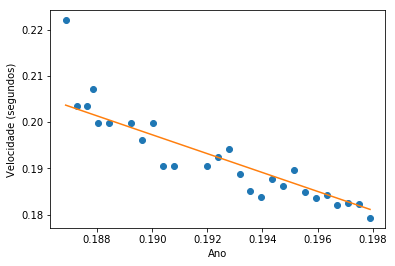

In [170]:
#t = wo + w1x
data_set = genfromtxt('100MetrosOlymp.csv', delimiter=',')
x = data_set[:,0]
t = data_set[:,1]

x = normalize(x)
t = normalize(t)

plt.xlabel("Ano")
plt.ylabel("Velocidade (segundos)")
plt.plot(x, t, 'o')
print(w)


w_norm = map(lambda u: w[0] + w[1] * u, x)
w_norm = normalize(list(w_norm))

plt.plot(x, w_norm)
plt.show()

<h4>Algumas considerações finais</h4>

Não sendo requisito obrigatório, penso que seja boa prática normalizar os dados antes de correr o gradiente. Desta forma, a procura do mínimo é mais rápida e eficiente. Isto acontece porque $\mathbf w$ desce rápido em intervalos pequenos  devagar em intervalos grandes. de forma que pode oscilar ineficientemente se as variáveis não estiverem nos mesmo intervalos.<br>

É interessante, sobretudo pare efeitos de debugging, plotar a função de erro, onde o eixo dos x representa o número de iteracções. Desta forma podemos ver se o gradiente está efectivamente a descer. Se não estiver, é provavel que se tenha de baixar mais o valor da <i>learnign rate</i><br>

Olhando para os dados, nota-se alguma oscilação ao longo dos anos. Nesse sentido poderá também ser interessante modelar a curva com um polinómio do género:

$$t(x,\mathbf w) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \sum_{j=0}^M w_j x^j$$

em vez de termos só

$$
t(x,\mathbf w) = w_0 + w_1x_n
$$

Ver <a href="https://aimlsite.wordpress.com/2018/03/16/ajuste-polinomial-com-python/">Ajuste Polinómial</a> para mais detalhes.

### Gradiente Descendente - Parte 2(Detalhado)

Métodos iterativos de otimização são usados toda a parte de Aprendizado de Máquina. Aqui, nós vamos olhar o método de gradiente descendente. Em se tratando de uma simples regressão linear, o método de gradiente descendente só é recomendado quando temos dados com muitas dimensões. Nesse caso, a inversão da matriz $$X^TX$$ começa a demorar muito e resolver regressão linear pela fórmula analítica $$w^=(X^TX)^−1 X^Ty$$ não vale mais a pena.

- Para melhor entendimento do algoritmo de otimização, é mais interessante começar usando-o em um problema mais simples, então vamos introduzir o algoritmo com um problema de regressão linear simples, com apenas uma variável na matriz de dados XX.

- A relação entre elas pode ser expressa na equação: \begin{aligned}\pmb{y} = b + \pmb{x} w + \pmb{\epsilon}\end{aligned} e nós queremos achar os valores b^ e w^ que minimizam o quadrado da norma do vetor e, isto é, minimizamos a soma dos quadrados dos resíduos.

- Matrmaticamente temos que perceber que a função epsilon é uma fujnção de b^ e w^, comi dindicada abaixo.

\begin{aligned} 
L(\hat{b}, \hat{w}) &= ||\pmb{\hat{\epsilon}}||^2 \\&=
\sum{\hat{\epsilon}}^2 \\&=
\sum{(\hat{y}} - y)^2 \\&=
\sum{(\hat{b} + x\hat{w}} - y)^2 \\&=
(\pmb{X}\pmb{\hat{w}} -\pmb{y} )^T(\pmb{X}\pmb{\hat{w}} -\pmb{y} )
\end{aligned}

Em que w^ é o vetor com os parâmetros, incluindo b^. Podemos minimizar essa função custo em seus parâmetros usando cálculo multivariado. Essa função custo - especifica de regressão linear - é uma função convexa, o que quer dizer que o único ponto de mínimo que ela tem é um mínimo global. Em outras palavras, a função custo pode ser vista como uma tigela, e o gradiente dessa função nos apontará a direção de descida mais íngreme, de forma que possamos chegar ao fundo da tigela, onde está o ponto de menor custo. No nosso exemplo com apenas dois parâmetros, essas direções são nos espaços de b^ e w^. Para implementar o gradiente descendente, basta atualizar simultaneamente os valores de b^ e w^, subtraindo deles as respectivas derivadas parciais da função custo, vezes uma taxa de aprendizado α (o sinal := abaixo significa atualizar):

\begin{aligned}\hat{b} := \hat{b} - \alpha \frac{\partial}{\partial \hat{b}}L(\hat{b}, \hat{w})\end{aligned}

\begin{aligned}\hat{w} := \hat{w} - \alpha \frac{\partial}{\partial \hat{w}}L(\hat{b}, \hat{w})\end{aligned}


- Se quisermos simplificar a notação mais ainda, podemos utilizar a notação de vetores:

\begin{aligned}\pmb{\hat{w}} := \pmb{\hat{w}} - \alpha \nabla(L)\end{aligned}

- No nosso caso, \begin{aligned}L(\pmb{\hat{w}} ) =(\pmb{X}\pmb{\hat{w}} -\pmb{y} )^T(\pmb{X}\pmb{\hat{w}} -\pmb{y} )\end{aligned}

- é a função custo e podemos achar o gradiente dela com cálculo de vetores:

\begin{aligned} 
\nabla(L) &= \frac{\partial}{\partial \pmb{\hat{w}}}(\pmb{X}\pmb{\hat{w}} -\pmb{y} )^T(\pmb{X}\pmb{\hat{w}} -\pmb{y} )
\\&= \frac{\partial}{\partial \pmb{\hat{w}}} (\pmb{\hat{w}}^T \pmb{X}^T \pmb{X} \pmb{\hat{w}} -2\pmb{\hat{w}}^T \pmb{X}^T \pmb{y}  + \pmb{y}^T\pmb{y} )
\\&= 2 \pmb{X}^T \pmb{X} \pmb{\hat{w}} -2 \pmb{X}^T \pmb{y}
\end{aligned}

- Em que w^ é o vetor dos parâmetros da regressão linear, incluindo o intercepto b^. Note que esse última regra de atualização é geral para qualquer número de dimensões que nossos dados possam ter.

### Implementando

- Para entender melhor como funciona o algoritmo de gradiente descendente, vamos simular alguns dados com uma relação conhecida, de forma que possamos ver o gradiente descendente em ação.

- Particularmente, vamos gerar dados x e y de forma que y=5+3x+ϵ, em que ϵ é algum erro aleatório. Nós sabemos que os valores ótimos de w^ e b^ seriam então 3 e 2, respectivamente, então poderemos ver quão perto deles chegarão os parâmetros aprendidos por gradiente descendente.

- Antes iremos visualizar a função custo por meio dos dois parametros que estamos analisando.

In [5]:
import pandas as pd
import numpy as np
np.random.seed(0)
from matplotlib import pyplot as plt

#definem os dados da equação sendo o x, n=100, entre o espaço de [x] -10 a 10 e a equação y=5+3x. 
dados = pd.DataFrame()
dados['x'] = np.linspace(-10,10,100)
dados['y'] = 5 + 3*dados['x'] + np.random.normal(0,3,100)


<IPython.core.display.Javascript object>


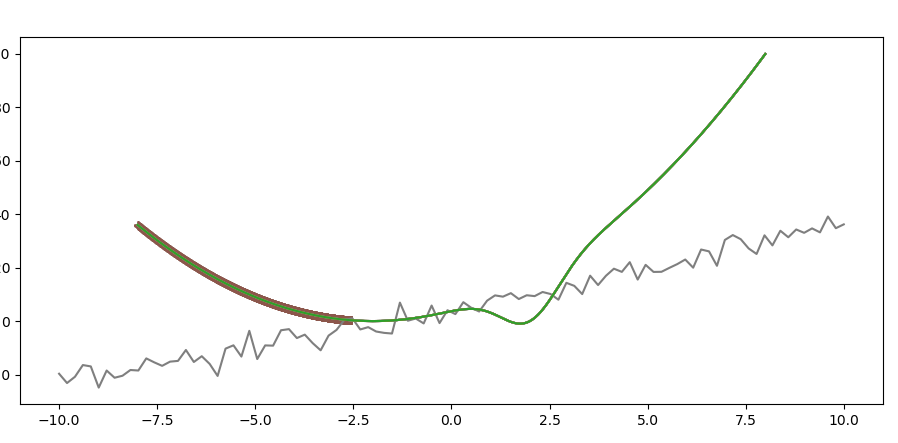

In [6]:
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook

# define a função custo
def L(y, y_hat):
    return ((y-y_hat) ** 2).sum()

# define valores de b_hat e w_hat entre o espaço indicado 
b_hat, w_hat = np.linspace(-10,20,40), np.linspace(0,6,40)

# acha o custo para cada combinação de b_hat e w_hat
loss = np.array([L(dados['y'], i + j * dados['x']) for i in b_hat for j in w_hat]).reshape(40,40)
b_hat, w_hat = np.meshgrid(b_hat, w_hat) # combina os b_hat e w_hat em uma grade

# faz o gráfico em 3d
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zticks([])
ax.set_xlabel('$\hat{b}$')
ax.set_ylabel('$\hat{w}$')
ax.set_zlabel('Custo', rotation=90)
surf = ax.plot_surface(b_hat, w_hat, loss,
                       rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
plt.show()

- A função de custo é convexa, portanto contento um ponto de minima. Portanto é possivel perceber como o ponto de mínimo da tigela(convexa) está onde $\hat{b}$=5 e $\hat{w}$=3. O gradiente dessa função é simplesmente um vetor de derivadas parciais, que dão a inclinação dessa tigela em cada ponto e em cada direção:
 \begin{aligned}\nabla(L)=\Bigg[\frac{\partial L}{\partial \hat{b}}, \frac{\partial L}{\partial \hat{w}} \Bigg]\end{aligned}

- Se nós seguirmos na direção oposta do gradiente, então chegaremos no ponto de mínimo. Podemos traçar uma analogia com uma bolinha de gude sendo solta em uma tigela: a bolinha descerá na direção mais inclinada e eventualmente parará no ponto mais baixo da tigela. Há uma importante diferença, no entanto. Quando falamos de uma bolinha de gude deslizando para o fundo de uma tigela, podemos visualizar a bolinha começando com uma pequena velocidade e acelerando ao longo do trajeto. Com gradiente descendente ocorre o oposto: inicialmente, os parâmetros $\hat{b}$ e $\hat{w}$ caminham rapidamente em direção ao ponto de mínimo e, quanto mais se aproximam dele, passam a caminhar cada vez mais devagar.

- Mas por que isso acontece? Pense em como a cada iteração os parâmetros $\hat{b}$ e $\hat{w}$ dão um passo em direção ao mínimo. O tamanho desse passo será o valor do gradiente naquele ponto multiplicado pela constante α. Assim sendo quanto mais próximos estamos do ponto de mínimo, menor a inclinação da função custo, OU SEJA menor o gradiente, OU SEJA, menor o passo dado em direção ao mínimo.

- Essa característica do método de gradiente descendente é ao mesmo tempo boa e ruim. É ruim pois atrasa o processo de aprendizado quando chegamos próximo do mínimo, mas é boa porque nos permite uma exploração mais minuciosa da superfície de custo em torno do ponto de mínimo. Dessa forma, podemos localizá-lo com mais precisão. Isso talvez não pareça muito importante nesse caso super simples de regressão linear com apenas dois parâmetros para aprender, mas quando estamos lidando com aprendizado de redes neurais com milhares de parâmetros e uma função custo não convexa você vai entender porque é importante essa exploração minuciosa do espaço da função custo.

**Vamos agora implementar a Regressão Linear com Gradiente Descendente**

- Algumas pequenas mudanças são necessárias no caso de uma regressão linear com vários parâmetros para aprender.

In [7]:
class linear_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=1000, show_learning=False):
        self.learning_rate = learning_rate
        self.training_iters = training_iters
        self.show_learning = show_learning

        
    def fit(self, X_train, y_train, plot=False):
        
        # formata os dados
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # para plotar o aprendizado (é preciso conhecer a equação geradora)
        if self.show_learning:
            assert X.shape[1] <= 2 # só é possível viazualizar 2 parâmetros - garantir uma condição para continuar a execução do código.
            self.w1_loss = [L(y_train, 5 + i * X_train) for i in np.linspace(0,6,20)]
            self.b_loss = [L(y_train, i + 3 * X_train) for i in np.linspace(-10,20,20)]
        
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,5, size = X[0].shape)
        
        loss = [] # para plotar o aprendizado
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for point, yi in zip(X, y_train):
                gradient +=  (point * self.w_hat - yi) * point
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado
                  
            # atualiza os parâmetros
            self.w_hat -= gradient
            
            l = ((y_train - self.predict(X_train)) ** 2).sum() # calcula o custo
                        
            loss.append(l) # armazeno o custo para gráfico
        
            if self.show_learning:
                # mostra o estado atual do aprendizado
                self._show_state(X_train, y_train, loss) 
            
        
    def predict(self, X_test):
        # formata os dados
        if len(X_test.values.shape) < 2:
            X = X_test.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        return np.dot(X, self.w_hat) 
    
    
    def _show_state(self, X_train, y_train, loss):
        # visualiza o processo de aprendizado
        lb = L(y_train, self.w_hat[0] + 3 * X_train) # calcula o custo na direção b
        lw = L(y_train, 5 + self.w_hat[1] * X_train) # calcula o custo na direção w

        # scatter plot
        plt.subplot(221)
        plt.scatter(X_train, y_train, s= 10)
        plt.plot(X_train, self.predict(X_train), c='r')
        plt.title('$y = b + w x$')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # loss
        plt.subplot(222)
        plt.plot(range(len(loss)), loss)
        plt.title('Custo')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # b_loss
        plt.subplot(223)
        plt.plot( np.linspace(-10,20,20), self.b_loss)
        plt.scatter(self.w_hat[0], lb, c = 'k')
        plt.title('Custo em $\hat{b}$')
        plt.tick_params(labelleft=False)
        plt.grid(True)
        
        # w_loss
        plt.subplot(224)
        plt.plot(np.linspace(0,6,20), self.w1_loss)
        plt.scatter(self.w_hat[1], lw, c = 'k')
        plt.title('Custo em $\hat{w}$')
        plt.grid(True)
        plt.tick_params(labelleft=False)
        
        plt.tight_layout()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico


<IPython.core.display.Javascript object>


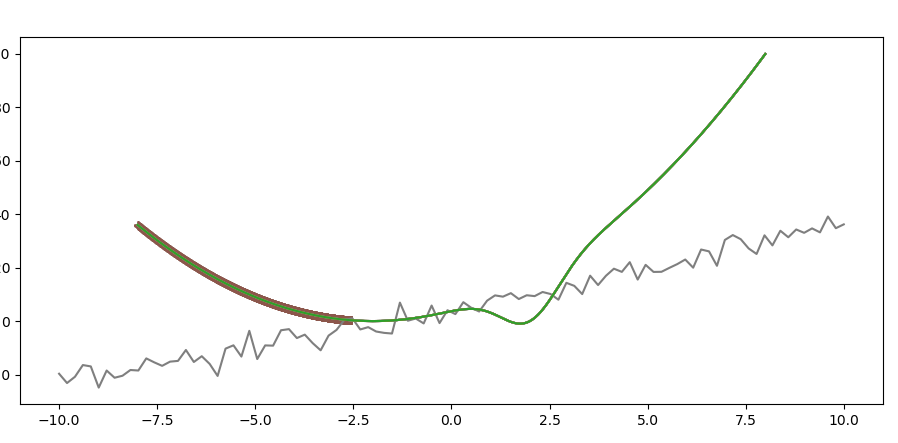

In [13]:
regr = linear_regr(learning_rate=0.0005, training_iters=30, show_learning=True)
regr.fit(dados['x'], dados['y'])

- Foi possuvel analisar como evolui a posição da reta que queremos encaixar nos dados (gráfico 1), o custo (gráfico 2), o parâmetro $\hat{b}$ (gráfico 3) e o parâmetro $\hat{w}$ (gráfico 4). Note como com apenas 30 iterações de treino nós conseguimos que os parâmetros aprendidos chegassem muito perto dos valores de mínimo.

- Assim sendo pode-se analisar que o algoritmo cumpriu com sua tarefa.

**Os Hiper-parâmetros**

- Diferentemente dos parâmetros $\pmb{\hat{w}}$ aprendidos durante o treinamento de uma regressão linear, os hiper-parâmetros nãos são aprendidos pela máquina durante o treinamento e devem ser ajustados manualmente. Eles são:

* Taxa de aparendizado
* Número de iterações de treino
* Os valores iniciais de $\pmb{\hat{w}}$

- No caso de regressão linear, como a função custo é convexa, não importa muito onde começamos em termos de $\pmb{\hat{w}}$. Se os outros dois hiper-parâmetros forem ajustados corretamente chegaremos no mínimo independentemente do ponto de partido (podemos deixa-la portanto e segundo plano).

- A taxa de aprendizado é colocada como o hiper parêmtetro mais importante. A taxa define o tamanho dos passos que daremos em direção ao mínimo em cada iteração. Se esses passos forem muito pequenos, é quase garantido que chegaremos ao ponto de mínimo da função, mas para isso talvez precisaremos de muitas iterações de treino, tornando o algoritmo desnecessariamente lento. Por outro lado, se colocarmos uma taxa de aprendizado muito alta, pode acontecer de sermos catapultados para cima da função custo e irmos cada vez mais longe do mínimo, resultando em uma falha completa de aprendizado. Nesse novo ponto, o gradiente será ainda maior, aumentando mais ainda o passo seguinte e nos arremessando ainda mais longe do ponto de mínimo a cada iteração.

- Podemos ver que a taxa de aprendizado não deve ser nem tão grande, nem tão pequena. Uma sugestão de ajustamento desse hiper-parâmetro é começar com 0.01 e explorar os pontos em volta dez vezes maior/menor (isto é, 0.1 e 0.001). Na maioria dos casos, uma boa taxa de aprendizado será algum dos seguintes valores: 1, 0.1, 0.01, 0.001, 0.0001, 0.00001.

- No caso aqui apresentado, o gráfico da função custo a cada iteração é bastante suave, mas pode acontecer de haver tanto iterações em que o custo cai quando iterações em que o custo sobe. Se esse é o caso e a função custo flutua muito a cada iteração, recomenda-se baixar a taxa de aprendizado. Se a função custo desce suavemente e constantemente, mas muito devagar, recomenda-se aumentar a taxa de aprendizado.

**Problemas**

- Sabemos que a otimização por gradiente descendente dará passos na direção mais inclinada, ou seja, na direção perpendicular as curvas de nível. Se as curvas de nível forem círculos perfeitos, gradiente descendente só dará passos em direção ao ponto de mínimo e convergirá rapidamente. Por outro lado, se as curvas de nível da superfície de custo forem elipses alongadas, o tempo de convergência dependerá fortemente da inicialização dos nossos parâmetros.

- Esse formato de elipse da função custo surge quando as variáveis dos nossos dados estão em escalas muito diferentes. Assim, uma solução simples para esse problema é deixar todos as variáveis na mesma escala. Uma forma de realizar isso é, para cada variável, subtrair a média e dividir pelo desvio padrão (normalização).

**Aprendendo em Mini-lotes ( Gradiente descendente estocástico)**

- Caso necessitemos utilizar um número maior de observações no caso milhões, que iria necessitar de muita mais memoria RAM, do que o necessario na nossa presente amostra de n=100. Você então inicia os parâmetros da regressão linear e agora precisaria percorrer todos os milhões de dados para computar o gradiente e dar apenas um passo da otimização. Em outras palavas, cada passo da otimização por gradiente descendente demora linearmente mais conforme mais dados temos. Isso é muito ineficiente e há uma forma muito mais rápida de realizar essa otimização.

- Agora considere que os seus dados tem alguma redundância, isto é, se você embaralhasse todas as observações, uma parte dos dados seria parecida com a outra? Se sim, então nós não precisamos percorrer todos os dados para computar o gradiente e podemos conseguir uma aproximação dele apenas olhando alguns exemplos dos dados. Essa é a ideia central por trás da técnica de gradiente descendente estocástico (G.D.E.).

- Para possibilitar que a otimização por gradiente descendente continue rápida mesmo com milhões de dados, nós vamos alterá-la da seguinte forma:

*1º - Embaralhamos os nossos dados de forma que se retirássemos diferentes sub-amostras deles, elas não defeririam muito.
*2º - ao invés de computar o gradiente usando todos os dados, nós vamos fazer uma estimação dele usando apenas alguns dados, digamos um lote de 5 observações. Nós então atualizaremos os parâmetros com base nessa estimação do gradiente. Na atualização seguinte, nós repetiremos esse processo, mas agora estimando o gradiente com o próximo lote de dados, e assim por diante.

- Devido ao pequeno numero de amostras utilizadas, as estimativas serão ruins, porém o que conta é a direção que ela nos dará, e na maior parte do tempo estará certa. Em resumo, com GDE precisaremos de mais iterações de treino para chegar próximo do mínimo, mas cada iteração demorará muito menos tempo e o aprendizado como um todo será mais rápido. A rigor, se gradiente descendente com todos os dados demora linearmente mais conforme mais dados temos, com GDE o tempo de treino é CONSTANTE e não aumenta com o a quantidade de dados! Isso porque pode acontecer de nem sequer precisarmos ver todas as observações para chegar a uma região razoável na função de custo.

- Ao utilizar GDE introduzimos mais um hiper-parâmetro que terá que ser ajustado manualmente: o tamanho do lote. É importante entender como esse hiper-parâmetro funciona para saber como ajustá-lo bem. Em geral, lotes maiores significam passos mais precisos em direção ao mínimo, mas ao mesmo tempo significa passos mais demorados.

In [14]:
np.random.seed(23)

class linear_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=30, batch_size=10, show_learning=False):#lotes de 10
        self.learning_rate = learning_rate
        self.training_iters = training_iters
        self.batch_size = batch_size
        self.show_learning = show_learning

        
    def fit(self, X_train, y_train, plot=False):
        
        # formata os dados
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # para plotar o aprendizado (é preciso conhecer a equação geradora)
        if self.show_learning:
            assert X.shape[1] <= 2 # só é possível viazualizar 2 parâmetros
            self.w1_loss = [L(y_train, 5 + i * X_train) for i in np.linspace(0,6,20)]
            self.b_loss = [L(y_train, i + 3 * X_train) for i in np.linspace(-10,20,20)]
        
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,5, size = X[0].shape)
        
        loss = [] # para plotar o aprendizado
        for i in range(self.training_iters):
            
            # cria os mini-lotes
            offset = (i * self.batch_size) % (y_train.shape[0] - self.batch_size)
            batch_X = X[offset:(offset + self.batch_size), :]
            batch_y = y_train[offset:(offset + self.batch_size)]
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação dos pontos do lote
            for point, yi in zip(batch_X, batch_y):
                gradient +=  (point * self.w_hat - yi) * point
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado
            
            
            # atualiza os parâmetros
            self.w_hat -= gradient
            
            l = ((y_train - self.predict(X_train)) ** 2).sum() # calcula o custo
                        
            loss.append(l) # armazeno o custo para gráfico
        
            if self.show_learning:
                # mostra o estado atual do aprendizado
                self._show_state(X_train, y_train, loss) 
            
        
    def predict(self, X_test):
        # formata os dados
        if len(X_test.values.shape) < 2:
            X = X_test.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        return np.dot(X, self.w_hat) 
    
    
    def _show_state(self, X_train, y_train, loss):
        # visualiza o processo de aprendizado
        lb = L(y_train, self.w_hat[0] + 3 * X_train) # calcula o custo na direção b
        lw = L(y_train, 5 + self.w_hat[1] * X_train) # calcula o custo na direção w

        # scatter plot
        plt.subplot(221)
        plt.scatter(X_train, y_train, s= 10)
        plt.plot(X_train, self.predict(X_train), c='r')
        plt.title('$y = b + w x$')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # loss
        plt.subplot(222)
        plt.plot(range(len(loss)), loss)
        plt.title('Custo')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # b_loss
        plt.subplot(223)
        plt.plot( np.linspace(-10,20,20), self.b_loss)
        plt.scatter(self.w_hat[0], lb, c = 'k')
        plt.title('Custo em $\hat{b}$')
        plt.tick_params(labelleft=False)
        plt.grid(True)
        
        # w_loss
        plt.subplot(224)
        plt.plot(np.linspace(0,6,20), self.w1_loss)
        plt.scatter(self.w_hat[1], lw, c = 'k')
        plt.title('Custo em $\hat{w}$')
        plt.grid(True)
        plt.tick_params(labelleft=False)
        
        plt.tight_layout()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico



<IPython.core.display.Javascript object>


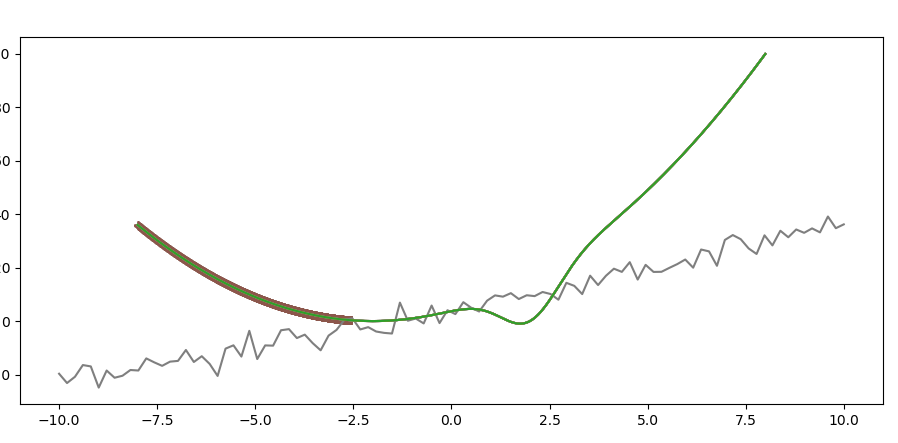

In [16]:
regr = linear_regr(learning_rate=0.0003, training_iters=40, show_learning=True)
regr.fit(dados['x'], dados['y'])

**Utilizando o Gradiente descendente na prática**

- Para implementar gradiente descendente precisamos da derivada parcial da função custo com relação aos parâmetros que queremos otimizar. Felizmente, na prática, as bibliotecas de programação especializadas em otimização já calculam essas derivadas automaticamente para nós. Mais ainda, nelas, gradiente descendente e suas variações já vem implementados.

- Para mostrar como utilizar gradiente descendente na prática vamos utilizar uma biblioteca de aprendizado de máquina desenvolvida pelo Google: TensorFlow. Veja como em poucas linhas podemos implementar a técnica de gradiente descendente para resolver nosso exemplo de regressão linear. Note também como podemos rodar muito mais iterações rapidamente:

In [18]:
dados['x'].values

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [19]:
dados['y'].values

array([-19.70784296, -23.19346777, -20.85166484, -16.45913858,
       -16.97308361, -24.90153061, -18.51337111, -21.21164738,
       -20.46117171, -18.31365904, -18.50726323, -13.97051281,
       -15.44415955, -16.75618707, -15.18356182, -14.90806793,
       -10.82079308, -15.31244449, -13.15170599, -16.0471357 ,
       -20.53775733, -10.31187149,  -9.07335807, -13.28710112,
        -3.64528158, -14.21158187,  -9.10514869,  -9.19791519,
        -3.43196539,  -3.01616611,  -6.35333954,  -5.07763365,
        -8.26941785, -10.9423894 ,  -5.43767584,  -3.31883188,
         0.50905386,   1.03138197,  -3.13167742,  -2.27054462,
        -3.90323465,  -4.41156896,  -4.66426512,   6.91293225,
         0.13771012,   0.95850437,  -0.8795982 ,   5.81731955,
        -0.75078445,   4.05874886,   2.61663062,   7.0697984 ,
         4.9827361 ,   3.57931557,   7.64272604,   9.61832894,
         9.13894561,  10.45287024,   8.24854887,   9.66935226,
         9.34625502,  10.89103749,  10.13631873,   8.00

In [20]:
import tensorflow as tf
import numpy as np

x, y = dados['x'].values, dados['y'].values # dados

# Monta a estrutura tf

# valores iniciais                  shape  
W_hat = tf.Variable(tf.random_normal([1], 0, 5))
b_hat = tf.Variable(tf.zeros([1]))

# modelo
y_hat = b_hat + W_hat * x

# Função custo
loss = tf.reduce_mean(tf.square(y_hat - y))

# otimizador e passo no treinamento
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

sess = tf.Session() # para rodar a estrutura
sess.run(tf.global_variables_initializer()) # inicia variáveis

for step in range(200):
    sess.run(optimizer)

w_final, b_final = sess.run([W_hat, b_hat])    
print('Após treinamento, w_hat = %.2f e b_hat = %.2f' % (w_final[0], b_final[0]))

sess.close()

C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Após treinamento, w_hat = 2.96 e b_hat = 5.09


- Portanto a interpretação dos resultados pode ser feita do seguinte modo: a equação possui um intercepto de 5.09 de inclinação e uma variação de 1.0 em Y leva uma variação de 5.09 em b_hast a variável independente.